In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize
import matplotlib
import pandas as pd
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'


## Model 1

In [ ]:

def model_1():
    '''
    Using an SIR based model, we model the change of the Ukrainian population as the war spreads.
    The main assumptions this model holds are:
    1) population remains constant
    2) people will not come back once the have left
    3) eventually everyone can leave
    '''
    t0 = 0   #represents the starting month (Feb 2022)
    tf = 36   #model the next 3 years after the start of the war
    n = 44000000   #initial population

    beta = 5   #rate of poeple one interacts with
    gamma = 1/1.25   #rate of how long it takes to leave

    # define the ode system as given in the problem
    def ode(t,y):
        return np.array([-beta*y[0]*y[1], beta*y[0]*y[1]-gamma*y[1],gamma*y[1]])
    
    # define the initial conditions
    y0 = np.array([(n-1000000)/n,1000000/n,0])
    # solve the system
    sol = solve_ivp(ode, (t0,tf), y0, t_eval=np.linspace(t0, tf, 150))
    
    # Plot the system and label/title everything
    plt.figure(figsize=(3, 2), dpi=300)
    plt.plot(sol.t,sol.y[0],label='Citizens in Ukraine',linewidth=.6)
    plt.plot(sol.t,sol.y[1],label='Citizens Moving',linewidth=.6)
    plt.plot(sol.t,sol.y[2],label='Citizens who Emigrated',linewidth=.6)
    plt.xlabel('T (Months)',fontsize="6")
    plt.ylabel('Proportion of Population',fontsize="6")
    plt.title('Ukrainian Emigration During War (Model 1)',fontsize="7")
    plt.legend(fontsize="5")
    plt.xticks(fontsize='5')
    plt.yticks(fontsize='5')
    plt.show()

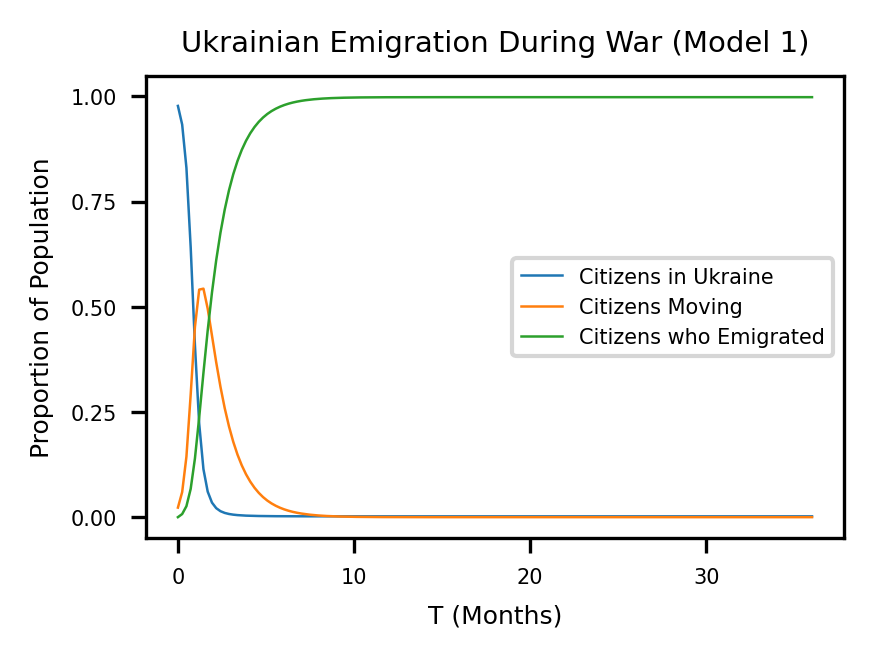

In [34]:
model_1()


## Model 2

In [47]:
def model_2():
    '''
    Using an SIR based model, we model the change of the Ukrainian population as the war spreads.
    The main assumptions this model holds are:
    1) population can change (we now include a death and birth rate)
    2) people will not come back once the have left
    3) eventually everyone can leave
    '''
    #set initial conditions
    t0 = 0   #represents the starting month (Feb 2022)
    tf = 36   #model the next 3 years after the start of the war
    n = 44000000   #initial population

    beta = 5   #rate of poeple one interacts with
    gamma = 1/1.25   #rate of how long it takes to leave

    birth = (8.6/1000)/12   #birth rate
    death = (18.5/1000)/12   #death rate

    # define the ode system as given in the problem
    def ode(t,y):
        return np.array([-beta*y[0]*y[1]+birth*y[0]-death*y[0], beta*y[0]*y[1]-gamma*y[1],gamma*y[1]])
    
    # define the initial conditions
    y0 = np.array([(n-1000000)/n,1000000/n,0])
    # solve the system
    sol = solve_ivp(ode, (t0,tf), y0, t_eval=np.linspace(t0, tf, 150))
    
    # Plot the system and label/title everything
    plt.figure(figsize=(3, 2), dpi=300)
    plt.plot(sol.t,sol.y[0],label='Citizens in Ukraine',linewidth=.6)
    plt.plot(sol.t,sol.y[1],label='Citizens Moving',linewidth=.6)
    plt.plot(sol.t,sol.y[2],label='Citizens who Emigrated',linewidth=.6)
    plt.xlabel('T (Months)',fontsize='6')
    plt.ylabel('Proportion of Population',fontsize='6')
    plt.title('Ukrainian Emigration During War (Model 2)',fontsize='7')
    plt.legend(fontsize='5')
    plt.xticks(fontsize='5')
    plt.yticks(fontsize='5')
    plt.show()

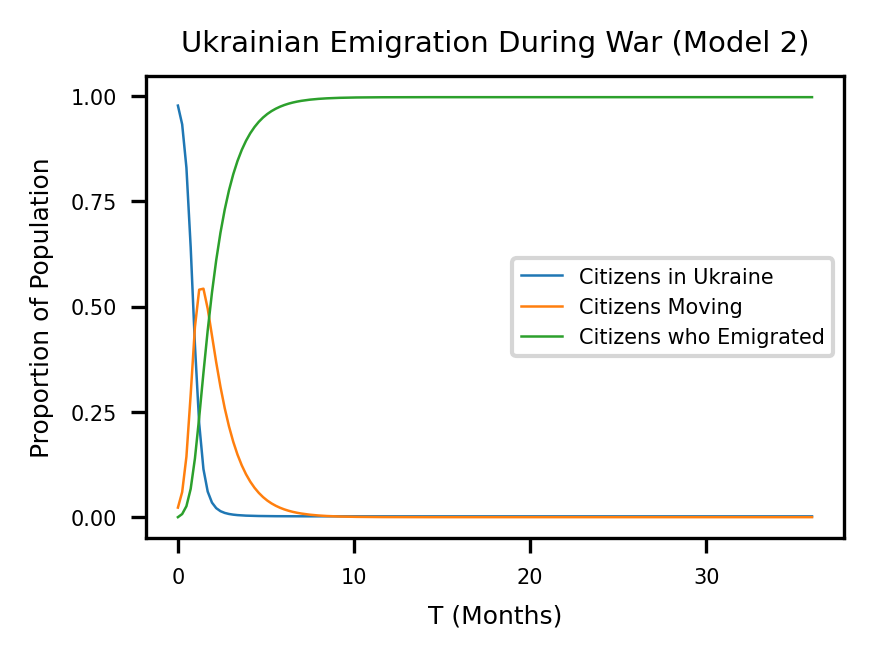

In [48]:
model_2()

## Model 3

In [45]:
def model_3():
    '''
    Using an SIR based model,we model the change of the Ukrainian population as the war spreads.
    The main assumptions this model holds are:
    1) population can change (we now include a death and birth rate)
    2) people will not come back once the have left
    3) only a certain number of citizens will leave (we now include a carrying capacity (k))
    '''
    #set initial conditions
    t0 = 0   #represents the starting month (Feb 2022)
    tf = 36   #model the next 3 years after the start of the war
    n = 44000000   #initial population

    beta = 5   #rate of poeple one interacts with
    gamma = 1/1.25   #rate of how long it takes to leave

    birth = (8.6/1000)/12   #birth rate
    death = (18.5/1000)/12   #death rate
    
    k = .6   #carrying capacity--places a limit on how many will leave

    #define ode measuring the spread of disease
    def ode(t,y): 
        return np.array([beta*y[1]*(1-y[0]/k),-beta*y[1]*(1-y[0]/k)-gamma*y[1], gamma*y[1]])

    #initial conditions
    y0 = np.array([(n-1000000)/n,1000000/n,0])

    #solve ivp and get solution
    sol=solve_ivp(ode,(t0,tf), y0, t_eval=np.linspace(t0,tf,150))
    
    #plots and labels
    plt.figure(figsize=(3, 2), dpi=300)
    plt.plot(sol.t,sol.y[0],label='Citizens in Ukraine',linewidth=.6)
    plt.plot(sol.t,sol.y[1],label='Citizens Moving',linewidth=.6)
    plt.plot(sol.t,sol.y[2],label='Citizens who Emigrated',linewidth=.6)
    plt.xlabel('T (Months)',fontsize='6')
    plt.ylabel('Proportion of Population',fontsize='6')
    plt.title('Ukrainian Emigration During War (Model 3)',fontsize='7')
    plt.legend(fontsize='5')
    plt.xticks(fontsize='5')
    plt.yticks(fontsize='5')
    plt.show()

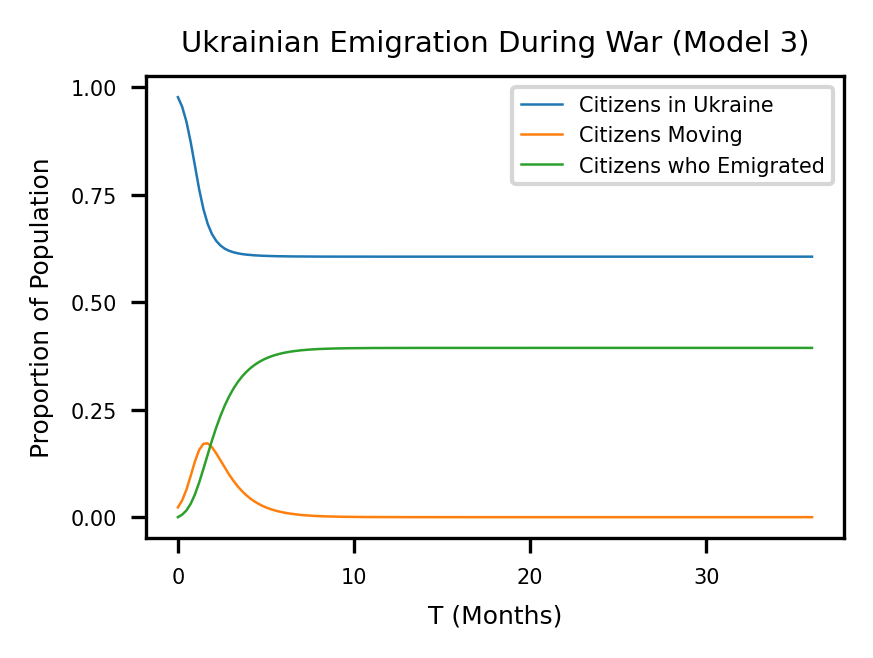

In [46]:
model_3()

## Model 4

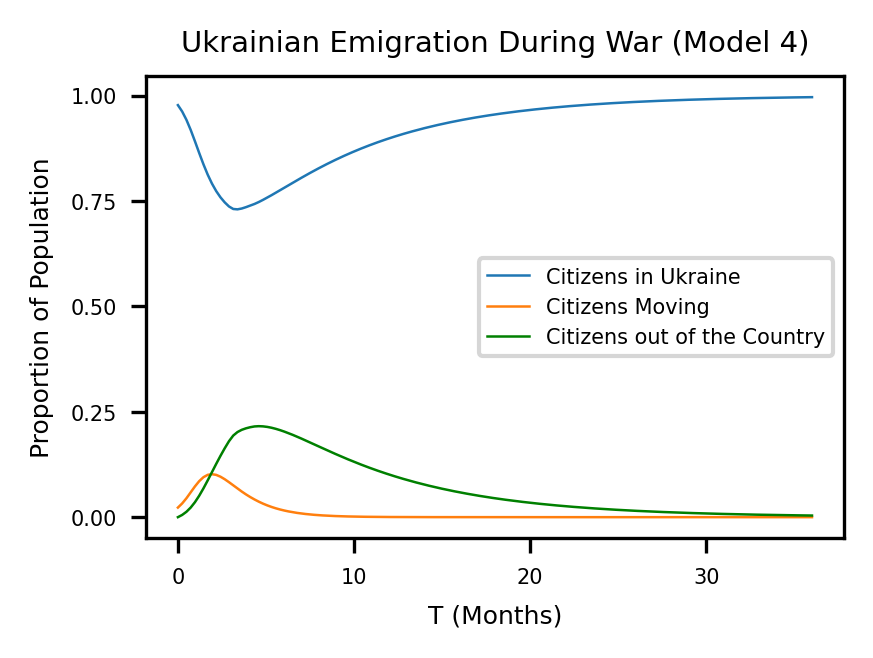

In [42]:
model_4()

## Comparison Plots

In [13]:
#clean and load real data
useful = pd.read_csv('Ukraine Explorer Inputs Prod - RefugeesSeries.csv')
data = useful.iloc[1:,:]
data['StartDate'] = data['RefugeesDate'].iloc[0]
data['StartDate'] = pd.to_datetime(data['StartDate'])

data.RefugeesDate = pd.to_datetime(data.RefugeesDate).copy()
data['TimeDifference'] = (data['RefugeesDate'] - data['StartDate']).dt.days / 30.44
data.set_index(['TimeDifference'],inplace=True)
data['NoRefugees'] = data['NoRefugees'].astype('int').copy()
n = 44e6
data['NoRefugees'] = (n - data['NoRefugees'])/n

/var/folders/sv/3h00w8hd0kj7ncygzkyfbr580000gn/T/ipykernel_13121/3454449839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['StartDate'] = data['RefugeesDate'].iloc[0]
/var/folders/sv/3h00w8hd0kj7ncygzkyfbr580000gn/T/ipykernel_13121/3454449839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['StartDate'] = pd.to_datetime(data['StartDate'])
/var/folders/sv/3h00w8hd0kj7ncygzkyfbr580000gn/T/ipykernel_13121/3454449839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [22]:
def comparison_1():
    '''
    This compares the actual data we see for Ukrainian population throughout the war to one of our best models (model 3).
    '''
    #set initial conditions
    t0 = 0   #represents the starting month (Feb 2022)
    tf = 36   #model the next 3 years after the start of the war
    n = 44e6   #initial population

    beta = 5   #rate of poeple one interacts with
    gamma = 1/1.25   #rate of how long it takes to leave
    
    k = 34e6/n   #carrying capacity--places a limit on how many will leave
    c = 75e5/n   #rate describing how many people return to Ukraine

    #define ode measuring the spread of disease
    def ode(t,y): 
        if t <1:
            return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1],0])
        else:
            return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1] - c * y[2],c * y[2]])
    #initial conditions
    y0 = np.array([(n-1e6)/n,1e6/n,0, 0])
    y0[3] = min(y0[3], 1 - y0[0])

    #solve ivp and get solution
    solution=solve_ivp(ode,(t0,tf), y0, t_eval=np.linspace(t0,tf,150))

    #plots and labels
    plt.figure(figsize=(3, 2),dpi=300,linewidth=10)
    plt.plot(solution.t, solution.y[0],label="ODE Numerical Approximation of Pop. of Ukraine", color = 'royalblue',linewidth=.6)
    plt.plot(data.index, data.NoRefugees, label = 'Actual Population of Ukraine', color = 'gold',linewidth=.6)
    plt.xlabel('T(Months)',fontsize="6")
    plt.title('Comparison of Actual Data and ODE System',fontsize="7")
    plt.ylabel('Proportion of Population',fontsize="6")
    plt.legend(fontsize="5")
    plt.xticks(fontsize='5')
    plt.yticks(fontsize='5')
    plt.show()

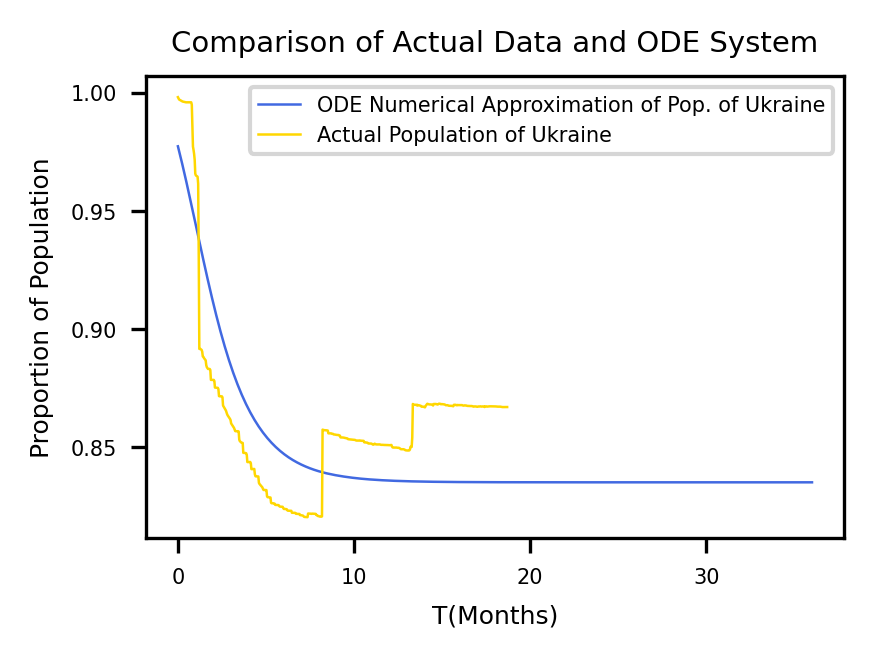

In [23]:
comparison_1()

In [24]:
def comparison_2():
    '''
    This compares the actual data we see for Ukrainian population throughout the war to one of our best model (model 4).
    '''
    #set initial conditions
    t0 = 0   #represents the starting month (Feb 2022)
    tf = 36   #model the next 3 years after the start of the war
    n = 44e6   #initial population

    beta = 5   #rate of poeple one interacts with
    gamma = 1/1.25   #rate of how long it takes to leave
    
    k = 31.5e6/n   #carrying capacity--places a limit on how many will leave
    c = 60e5/n   #rate describing how many people return to Ukraine

    #define ode measuring the spread of disease
    def ode(t,y): 
        if t <3:
            return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1],0])
        else:
            return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1] - c * y[2],c * y[2]])
    #initial conditions
    y0 = np.array([(n-1e6)/n,1e6/n,0, 0])
    y0[3] = min(y0[3], 1 - y0[0])

    #solve ivp and get solution
    solution=solve_ivp(ode,(t0,tf), y0, t_eval=np.linspace(t0,tf,150))

    #plots and labels
    plt.figure(figsize=(3, 2),dpi=300,linewidth=10)
    plt.plot(solution.t, solution.y[0]+solution.y[3],label="Approximation of Citizens in Ukraine", color = 'royalblue',linewidth=.6)
    plt.plot(data.index, data.NoRefugees, label = 'Actual Population of Ukraine', color = 'gold',linewidth=.6)
    plt.xlabel('T (Months)',fontsize="6")
    plt.title('Comparison of Actual Data and ODE System',fontsize="7")
    plt.ylabel('Proportion of Population',fontsize="6")
    plt.legend(fontsize="5")
    plt.xticks(fontsize='5' )
    plt.yticks(fontsize='5' )
    plt.show()

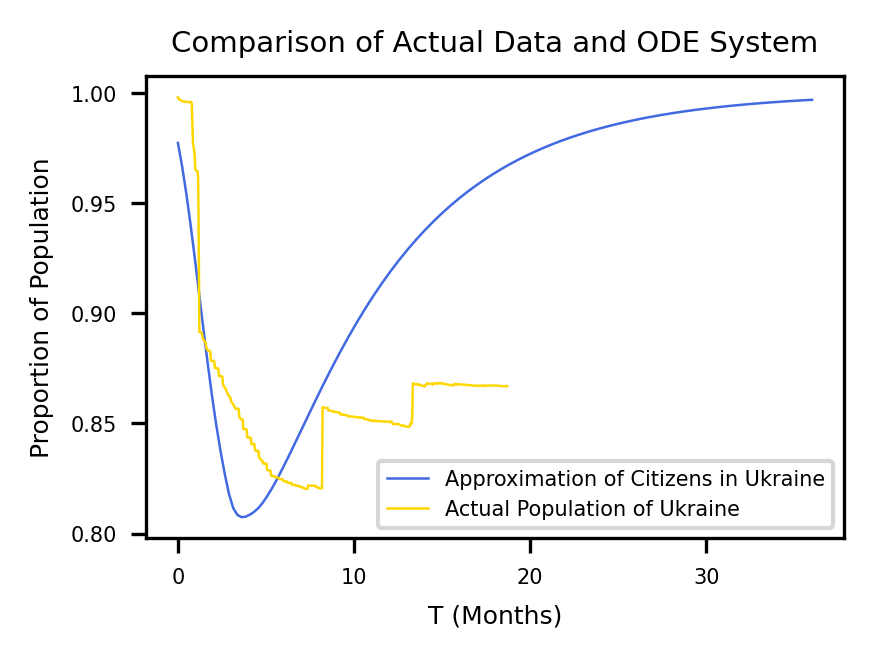

In [25]:
comparison_2()